In [1]:
import os, itertools, multiprocessing
# os.environ['OMP_NUM_THREADS']="1"
import numpy as np
import pandas as pd
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt
# from hmmviz import TransGraphy
import networkx as nx
from sklearn.cluster import KMeans
import ipywidgets as widgets
from ipywidgets import interactive
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import scipy

In [2]:
def create_adjacency_matrix_for_modular_graph(num_nodes, num_modules, module_sizes, inter_module_edges, boundary_nodes,  edges_to_remove = None):
  """
  Creates an adjacency matrix for a graph with modular structure.

  Args:
    num_nodes: The total number of nodes in the graph.
    num_modules: The number of modules in the graph.
    module_sizes: A list of the sizes of each module.
    inter_module_edges: A list of edges between modules.

  Returns:
    An adjacency matrix for the graph.
  """

  # Create an empty adjacency matrix.
  adj_matrix = np.zeros((num_nodes, num_nodes))

  # Add edges within each module.
  for module_index in range(num_modules):
    module_start_index = sum(module_sizes[:module_index])
    module_end_index = module_start_index + module_sizes[module_index]

    for node_index in range(module_start_index, module_end_index):
      for other_node_index in range(module_start_index, module_end_index):
        if node_index != other_node_index:
          adj_matrix[node_index, other_node_index] = 1
        
  for node_i in boundary_nodes:
    for node_j in boundary_nodes:
      adj_matrix[node_i][node_j] = 0

  if edges_to_remove is not None:
    for edge in edges_to_remove:
      node_index_1, node_index_2 = edge
      adj_matrix[node_index_1, node_index_2] = 0
      adj_matrix[node_index_2, node_index_1] = 0

  # Add edges between modules.
  for edge in inter_module_edges:
    node_index_1, node_index_2 = edge
    adj_matrix[node_index_1, node_index_2] = 1
    adj_matrix[node_index_2, node_index_1] = 1

  return adj_matrix


modular_graph = create_adjacency_matrix_for_modular_graph(15, 3, [5, 5, 5], [(0, 14), (4, 5), (9, 10)], [0, 4, 5, 9, 10, 14])

In [3]:
def get_encoded(encoding_rate, forgetting_rate, stim_stream):
    encoder = np.zeros((15, 18))
    forgetting_rate = 0.1
    encoding_rate = 0.9
    for i in stim_stream:
        encoder = encoder - forgetting_rate*encoder
        encoder[i] = encoder[i] + encoding_rate*obj_cat_feature_matrix[i]
            

<AxesSubplot: >

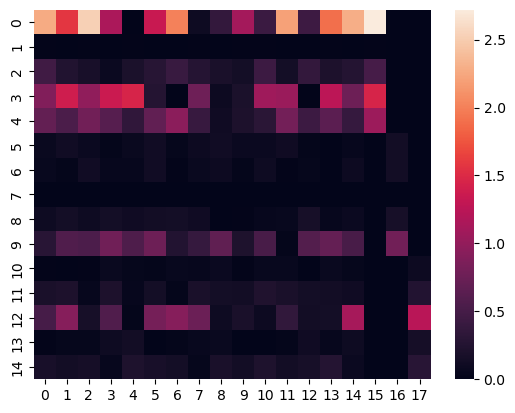

In [16]:
sns.heatmap(encoder)

<AxesSubplot: >

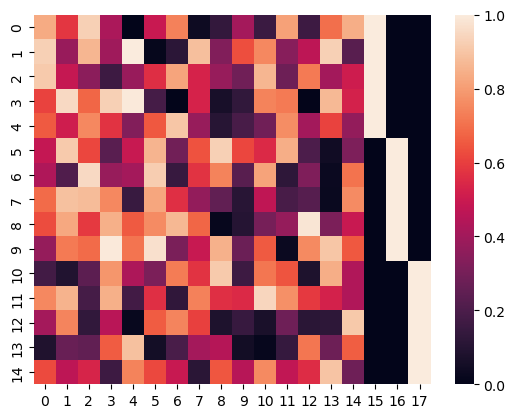

In [17]:
sns.heatmap(obj_cat_feature_matrix)